# Spatial resolution
Spatial resolution refers to the smallest perceptible unit of an image. Such a unit is only measurable if a distance measure is introduced. Common distance measures are dpi (distance per inch) and pixels (pels) per inch.
To develop an intuition for this subject matter, imagine positioning a vector along the diagonal of an image. The vectors' magnitude spans across the whole diagonal, meaning that the tip of the vector is positioned at the last pixel, and the root of the vector and the first pixel. The number of pixels you can fit across that vector refers to a quantification of the spatial resolution with respect to the image. The more pixels that are allocated in that area, the higher the spatial resolution. 

In [2]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [3]:
img = Image.open('./data/berlin-sample-photo.jpg').convert('L')

(2880, 1860)


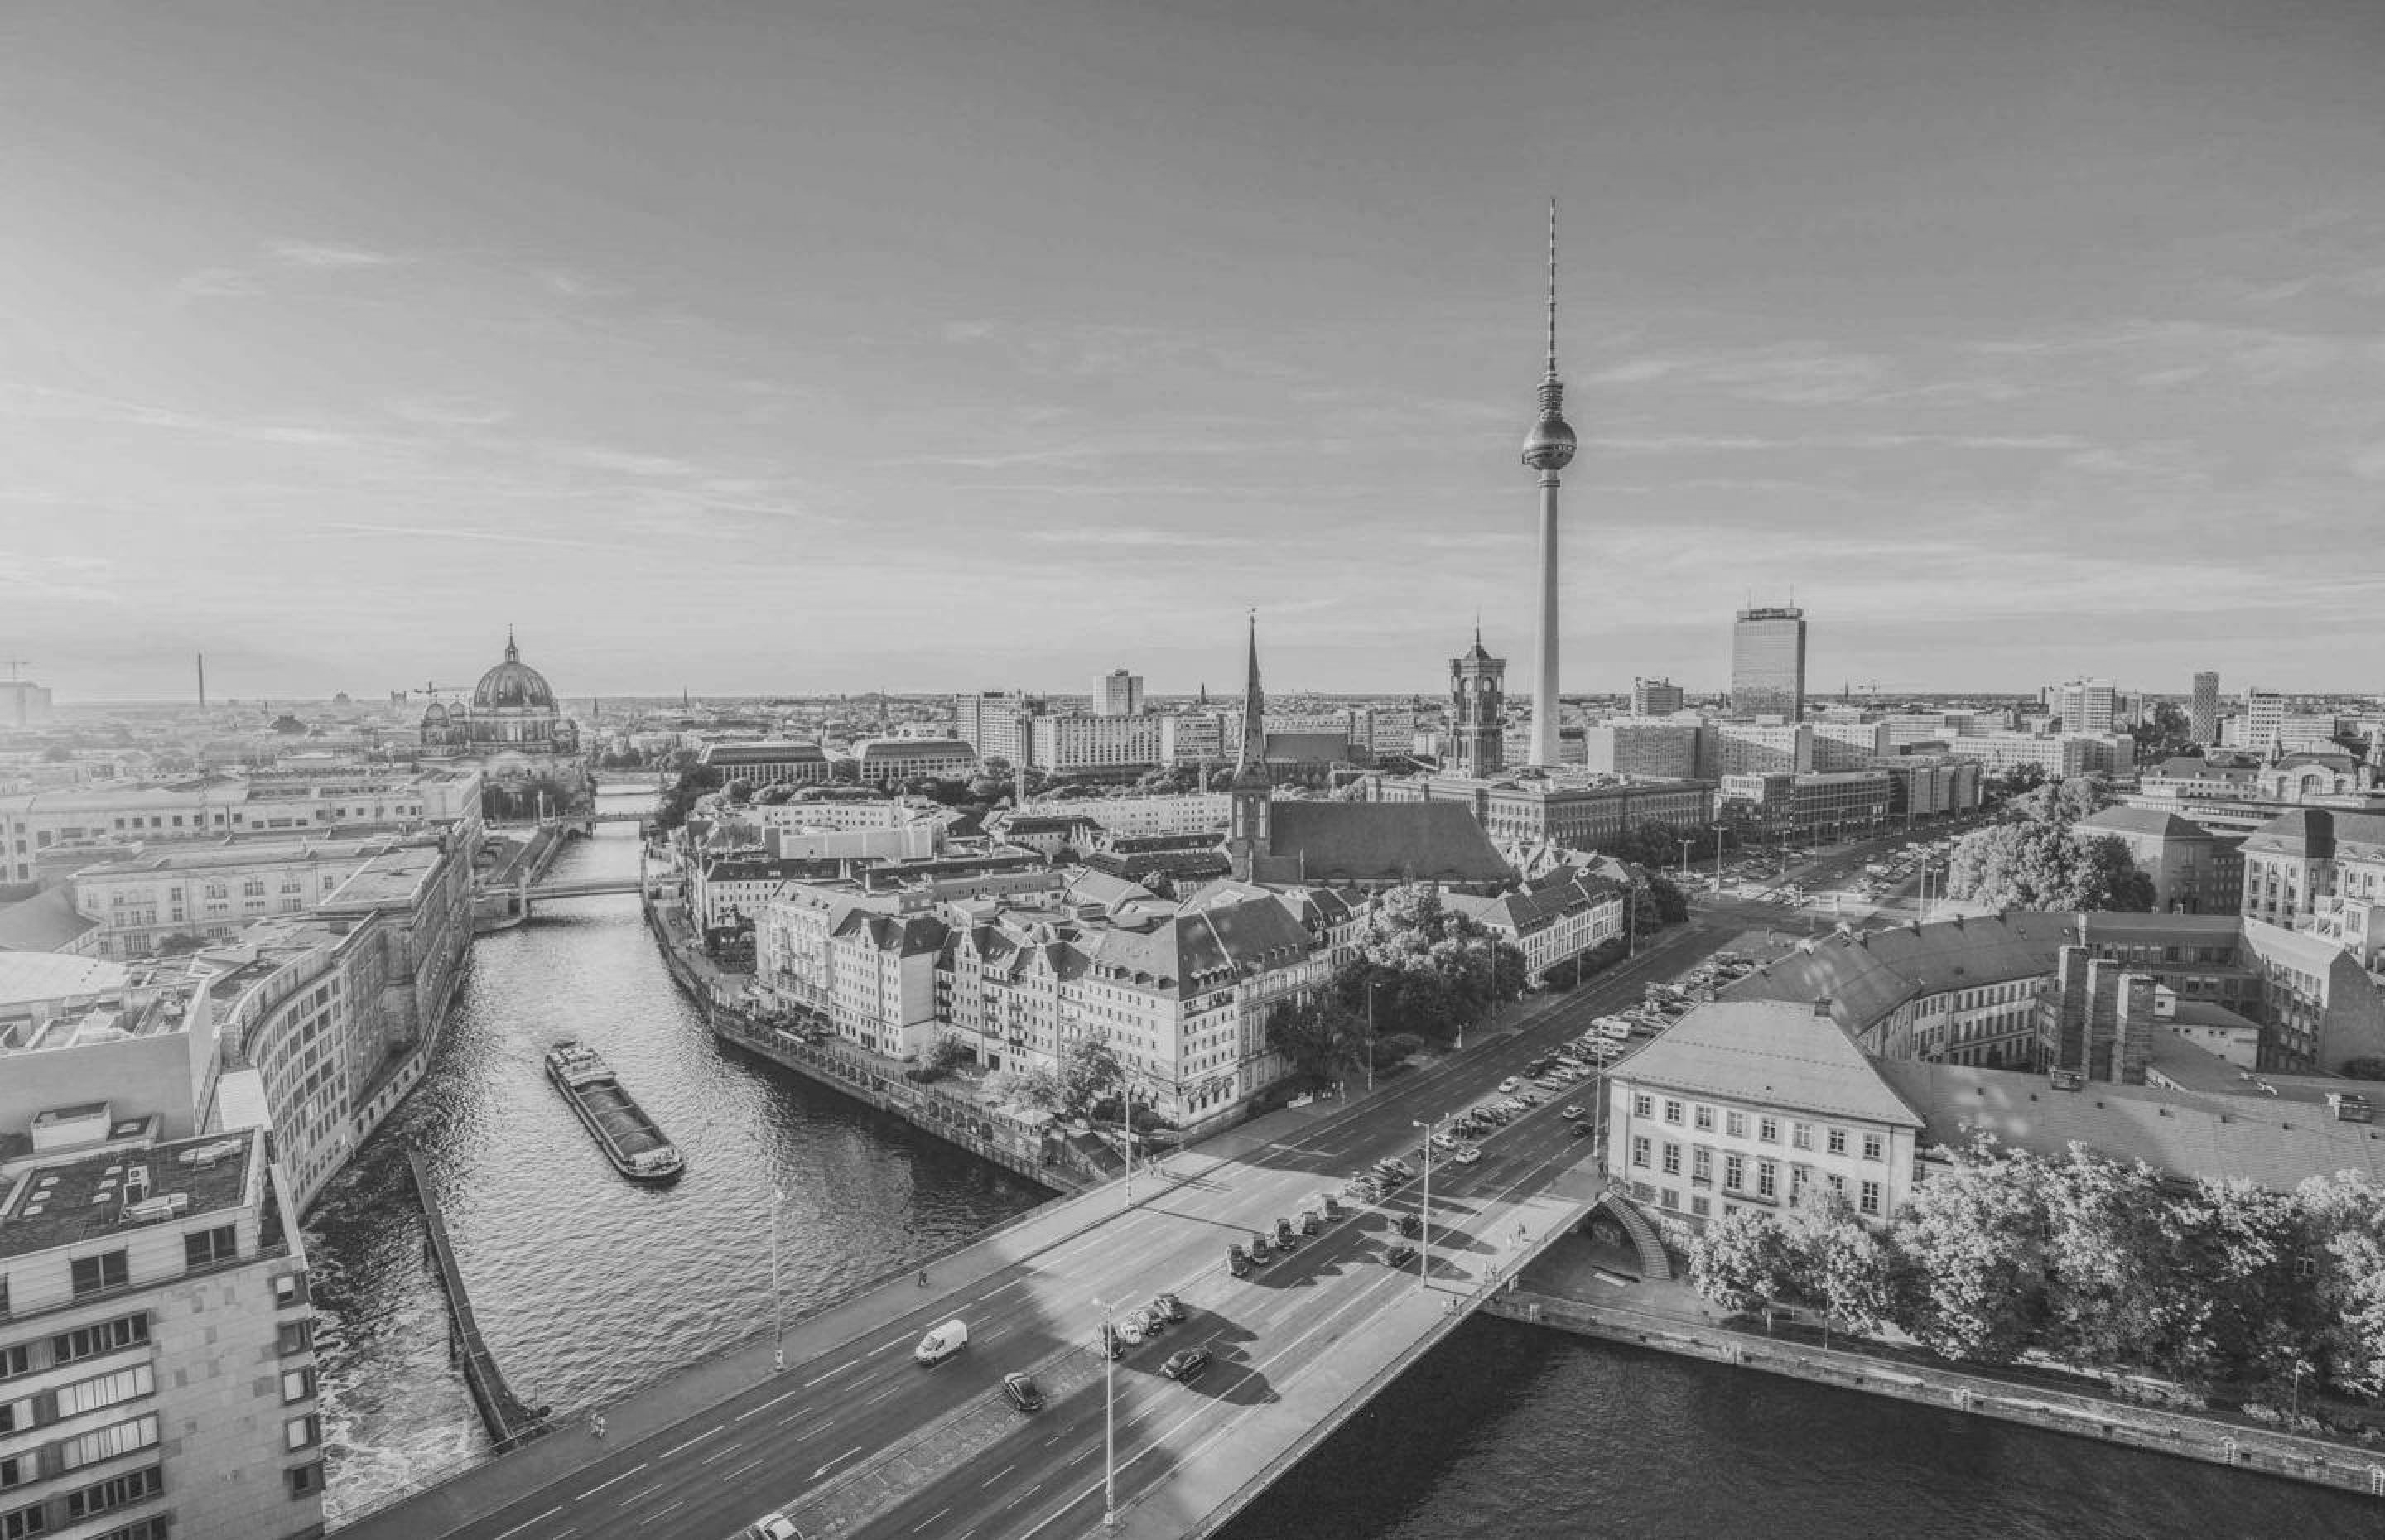

In [4]:
print(img.size)
img

The introduced image is obviously quite big. When we reduce the spatial resolution, the image will be truncated to a smaller size. Therefore, we need to interpolate over the image to set the sparse pixels to some estimated value. This can be done in multiple ways. For the purposes of this task, nearest neighbor interpolation will be used.

In [50]:
img = np.array(img) # Convert image to numpy array.
img = img/255

In [104]:
def sample(img, interval=2):
    """Samples the image based on a given interval
        
    Keyword arguments:
    img -- The image to sample -> (N, M)
    interval -- The sampling interval -> int
    """
    img_width = img.shape[0]
    img_height = img.shape[1]
    
    result = np.empty(shape=(img_width, int(img_height/interval)))
    idx=0
    for i in range(0, img_width):
        line = img[i]
        for j in range(0, line.size, interval):
            result[i][idx] = line[j]
            idx+=1
        idx=0
            
    return result

(1860, 180)

In [105]:
def nn_inter(sampled_img):
    ow, oh = 1860, 2880
    iw, ih = sampled_img.shape[0], sampled_img.shape[1]
    arw = ow/iw
    arh = oh/ih
    
    result = np.empty(shape=(ow, oh))
    for i in range(0, ow):
        for j in range(0, oh):
            wi= int(np.floor(i/arw))
            hi = int(np.floor(j/arh))
            result[i][j] = sampled_img[wi][hi]
    return result

Observing the results underneath, we can see that the image resolution starts to decrease as we increase the sampling interval. In other words, that diagonal vector I mentioned earlier starts to span a smaller number of pixels, because they are effectively being sampled out. Applying nearest neighbor interpolations makes a rather invalid assumption that the pixel values that were sampled out should hold the value of the nearest pixel (in space) whose value is known. 
Note that the deduction in pixel quality is highly perceptible after a very high number of iterations. The reason fir this is that the image being manipulated has a very high level of detail embedded in its intensity. The 'perception threshold' is therefore higher, because the human eye cannot detect 

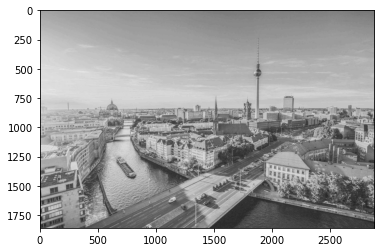

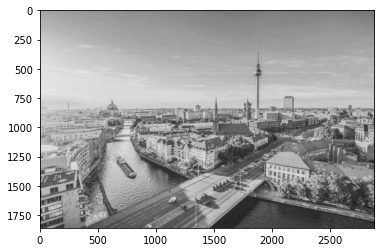

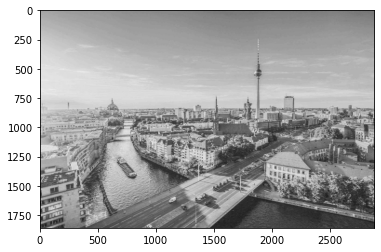

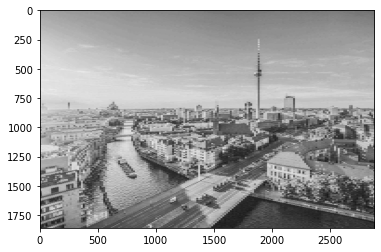

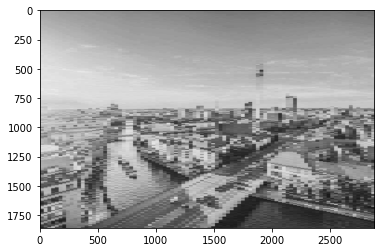

In [109]:
for i in range(1, 6):
    plt.show()
    k = np.power(2, i)
    interpolated = nn_inter(sample(img, interval=k))
    plt.imshow(interpolated, cmap='gray', aspect='auto')